In [1]:
# Es esta parte vamos a importar las librerías que vamos a utilizar

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JYHEd98PIWJ6NjY_R2c9jZXW9uVYmpazGQqZTN__M1EE',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'riesgocrediticiotaller-donotdelete-pr-p1rolckkzzuvfj'
object_key = 'Riesgo-Crediticio-Historico.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

datos = pd.read_csv(body)
datos.head()


,CustomerID,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,4e561ef3-a927-4107-aa12-18ac5772ec63,less_0,6,all_credits_paid_back,car_used,250,less_100,1_to_4,2,male,...,savings_insurance,28,stores,rent,1,skilled,1,none,yes,Risk
1,2663eaee-4f6b-4c84-b816-0b589b6690c8,less_0,14,all_credits_paid_back,appliances,1431,less_100,unemployed,1,female,...,car_other,25,stores,own,1,skilled,1,none,yes,Risk
2,c1324b0f-7b7d-42d5-896b-ee81988e54f3,greater_200,5,credits_paid_to_date,car_used,250,less_100,4_to_7,3,male,...,savings_insurance,42,none,rent,1,skilled,1,none,yes,No Risk
3,c199d5c4-8b0e-4f86-8d36-9b3528ed69b0,less_0,11,all_credits_paid_back,furniture,2016,less_100,less_1,1,female,...,car_other,34,bank,own,1,unemployed,1,none,yes,No Risk
4,c8b70d96-763d-4af5-835a-fc8e1008cfa1,less_0,4,credits_paid_to_date,car_new,250,less_100,unemployed,1,female,...,real_estate,29,none,rent,1,skilled,1,none,yes,No Risk


In [3]:
# Definimos que datos son relevantes para hacer en nuestro modelo
datos= datos[['ExistingCreditsCount','Age','CurrentResidenceDuration','LoanDuration','Risk']]

In [4]:
# Corroboramos que los datos que necesito estén en un la variable "Datos" y además que me muestre los primeros cinco registros
datos.head()

,ExistingCreditsCount,Age,CurrentResidenceDuration,LoanDuration,Risk
0,1,28,2,6,Risk
1,1,25,1,14,Risk
2,1,42,2,5,No Risk
3,1,34,1,11,No Risk
4,1,29,1,4,No Risk


In [5]:
# En este paso Tendremos que cambiar Riks de String a valores numéricos para poder utilizar nuestro clasificador XGB
datos['Risk']= datos ['Risk'].map( {'No Risk':0,'Risk':1} )

In [6]:
# Para ver que se hayan hecho el cambio de String a Numérico nuevamente mostraremos los primeros cinco registros
datos.head()

,ExistingCreditsCount,Age,CurrentResidenceDuration,LoanDuration,Risk
0,1,28,2,6,1
1,1,25,1,14,1
2,1,42,2,5,0
3,1,34,1,11,0
4,1,29,1,4,0


In [7]:
# En este paso voy a definir cuál es mi variable independiente y mi variable de salida
X = datos.drop('Risk', axis=1)
y = datos ['Risk']

In [8]:
# En este punto voy a dividir mis datos para entrenar y hacer pruebas de mi modelo
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)

In [9]:
# Definimos el clasificador, en este caso el XGB
model = XGBClassifier()

In [10]:
# Ajustamos el modelo
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

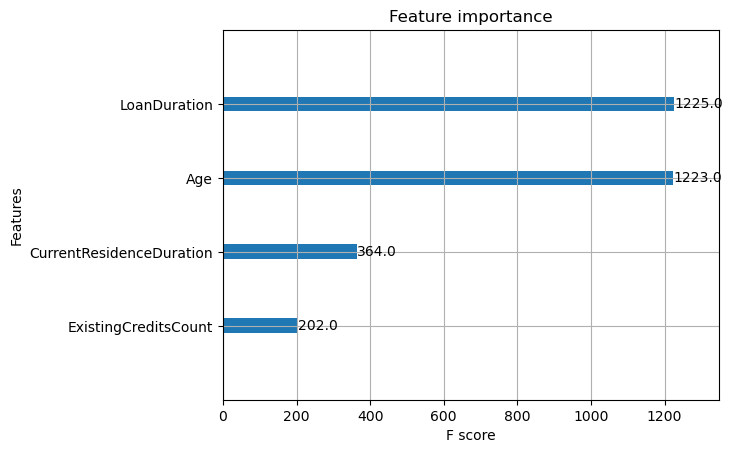

In [11]:
# Graficamos las variables de acuerdo a la importancia de nuestro modelo
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_importance(model, ax=plt.gca())

In [12]:
# Probamos nuestro modelo
predictions = model.predict(X_test)

In [13]:
# Vemos las primeras diez predicciones
predictions[1:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0])

In [14]:
# Mostramos cuáles son los datos que se tomaron para hacer la predicción
X_test.head(10)

,ExistingCreditsCount,Age,CurrentResidenceDuration,LoanDuration
836,1,40,2,25
4536,1,40,1,17
2583,1,38,2,17
2098,1,30,1,4
3119,2,54,4,31
3774,1,37,3,15
771,1,39,2,8
3431,3,52,4,45
4783,2,46,4,24
4298,2,34,4,24


In [15]:
# Exactitud del modelo
model.score(X_test, y_test)

0.7387755102040816